In [6]:
# import plotting tools & formatting. 
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "6"
plt.rcParams['axes.linewidth'] = 0.65
plt.rcParams['lines.linewidth'] = 0.65
plt.rcParams['lines.markersize'] = 2.5

# import packages
from pymatgen import Structure
from pymatgen.core import trajectory
from pymatgen.io.vasp import Xdatcar
from vasppy.rdf import RadialDistributionFunction # (https://github.com/bjmorgan/vasppy)


In [ ]:
xd_cathode = Xdatcar('../Data/Data_fluid_O2/Cathode_Li0.2Mn0.8O2/XDATCAR_N_subbed')
xd_liquid_O2 = Xdatcar('../Data/Data_fluid_O2/Liquid_O2/XDATCAR_liquid_O2')

In [ ]:
# To distinguish between O ions in the lattice and O atoms in O2 molecules, the O atoms 
# in O2 molecules have been substituted for 'N' atoms in the XDATCAR (XDATCAR_N_subbed) which
# is used for this analysis. Hence, when we compute the RDF from Mn to O2 moleculec, 
# we references 'N' species, and likewise, the O2–O2 RDF references 'N'

rdf_Mn_O_xd_cathode = RadialDistributionFunction.from_species_strings(structures=xd_cathode.structures,
                                                                species_i='Mn',species_j='O')
rdf_Mn_O2_xd_cathode = RadialDistributionFunction.from_species_strings(structures=xd_cathode.structures,
                                                                species_i='Mn',species_j='N')
rdf_O2_O2_xd_cathode = RadialDistributionFunction.from_species_strings(structures=xd_cathode.structures,
                                                                species_i='N',species_j='N')

In [ ]:
# All O atoms in the box of liquid O2 are labelled 'O'
rdf_O_O_liquid = RadialDistributionFunction.from_species_strings(structures=xd_liquid_O2.structures,
                                                                species_i='O')

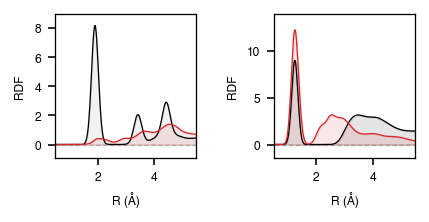

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(2.5, 1.))
a = axes[0]
b = axes[1]

x1 = [-10,20]
y1 = [0,0]

a.plot(x1,y1,'--',color = 'k', alpha = 0.25)

a.plot(rdf_Mn_O_xd_cathode.r, rdf_Mn_O_xd_cathode.smeared_rdf(), 
       label='Mn$\cdots$O$^{2–}$', color = 'black')
a.fill_between(rdf_Mn_O_xd_cathode.r, rdf_Mn_O_xd_cathode.smeared_rdf(),0,  
               color = 'black', alpha = 0.05)

a.plot(rdf_Mn_O2_xd_cathode.r, rdf_Mn_O2_xd_cathode.smeared_rdf(), 
       label=r'Mn$\cdots$$O_2$', color = 'tab:red')
a.fill_between(rdf_Mn_O2_xd_cathode.r, rdf_Mn_O2_xd_cathode.smeared_rdf(),0,  
               color = 'tab:red', alpha = 0.1)

a.set_xlim(0.5,5.5)
a.set_ylim(-0.9,9)
a.set_ylabel('RDF')
a.set_xlabel('R (Å)')


b.plot(x1,y1,'--',color = 'k', alpha = 0.25)

b.plot(rdf_O_O_liquid.r, rdf_O_O_liquid.smeared_rdf(),  color = 'black')
b.fill_between(rdf_O_O_liquid.r, rdf_O_O_liquid.smeared_rdf(),0,
               color = 'black', alpha = 0.1)

b.plot(rdf_O2_O2_xd_cathode.r, rdf_O2_O2_xd_cathode.smeared_rdf(),  color = 'tab:red')
b.fill_between(rdf_O2_O2_xd_cathode.r, rdf_O2_O2_xd_cathode.smeared_rdf(),0,
               color = 'tab:red', alpha = 0.1)

b.set_xlim(0.5,5.5)
b.set_ylim(-1.4,14)
b.set_xlabel('R (Å)')
b.set_ylabel('RDF')

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=1,
                    wspace=0.55, hspace=0.0)

#plt.savefig('Fig_4ab_RDFs.svg', dpi=300, bbox_inches='tight', format='svg')

plt.show()